In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
df = pd.read_csv('../data/dataset_SCL.csv')

/var/folders/q4/hqn7rgnd2776w9b_lc4r0vlr0000gn/T/ipykernel_2578/3157898594.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/dataset_SCL.csv')


In [3]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

|Variable|Definción|
|--|--|
|**Fecha-I** | Fecha y hora programada del vuelo|
|**Vlo-I** | Número de vuelo programado.|
|**Ori-I** | Código de ciudad de origen programado.|
|**Des-I** | Código de ciudad de destino programado.|
|**Emp-I** | Código aerolínea de vuelo programado.|
|**Fecha-O** | Fecha y hora de operación del vuelo.|
|**Vlo-O** | Número de vuelo de operación del vuelo.|
|**Ori-O** | Código de ciudad de origen de operación|
|**Des-O** | Código de ciudad de destino de operación.|
|**Emp-O** | Código aerolínea de vuelo operado.|
|**DIA** | Día del mes de operación del vuelo.|
|**MES** | Número de mes de operación del vuelo.|
|**AÑO** | Año de operación del vuelo.|
|**DIANOM** | Día de la semana de operación del vuelo.
|**TIPOVUELO** | Tipo de vuelo, I =Internacional, N =Nacional.
|**OPERA** | Nombre de aerolínea que opera.
|**SIGLAORI** | Nombre ciudad origen.|
|**SIGLADES** | Nombre ciudad destino.|

### Preprocesamiento

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [5]:
# Transformar variables de fecha de string a datetime
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

In [6]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### Feature Engineering

In [54]:
df['fecha'] = df['Fecha-O'].dt.date

In [33]:
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).apply(lambda x: x.total_seconds() / 60)

In [58]:
def temporada_alta(fecha_i):
    month = fecha_i.month
    day = fecha_i.day
    
    # Temporada Alta 1
    if (month==12 and day>=15) or (month<3) or (month==3 and day<=3):
        return 1
    
    # Temporada Alta 2
    elif month==7 and (15<=day<=31):
        return 1
    
    # Temporada Alta 3
    elif month==9 and (11<=day<=30):
        return 1
    
    else:
        return 0
        
df['temporada_alta'] = df['Fecha-I'].apply(temporada_alta)

In [79]:
df['atraso_15'] = df['dif_min'].apply(lambda x: 1 if x>15 else 0)

In [111]:
def periodo_dia(fecha_i):
    flight_time = fecha_i.hour
    
    if 5 <= flight_time < 12:
        return 'mañana'
    elif 12 <= flight_time < 19:
        return 'tarde'
    else:
        return 'noche'
    
df['periodo_dia'] = df['Fecha-I'].apply(periodo_dia)

In [117]:
df[['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']].to_csv('../data/synthetic_features.csv')

### EDA

#### Variables de Fecha

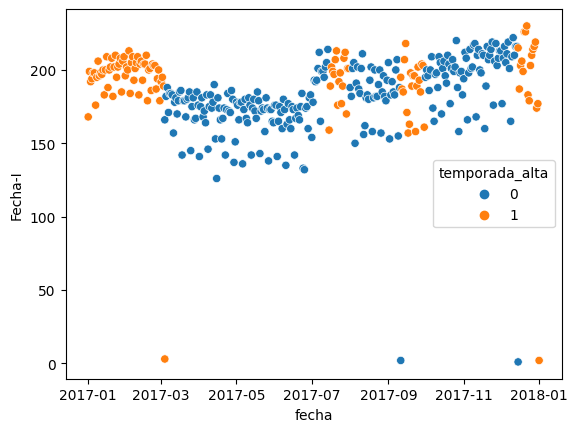

In [78]:
flight_numbers = df.groupby(['fecha', 'temporada_alta']).count()['Fecha-I'].reset_index()

sns.scatterplot(data=flight_numbers, x='fecha', y='Fecha-I', hue='temporada_alta')
plt.show()

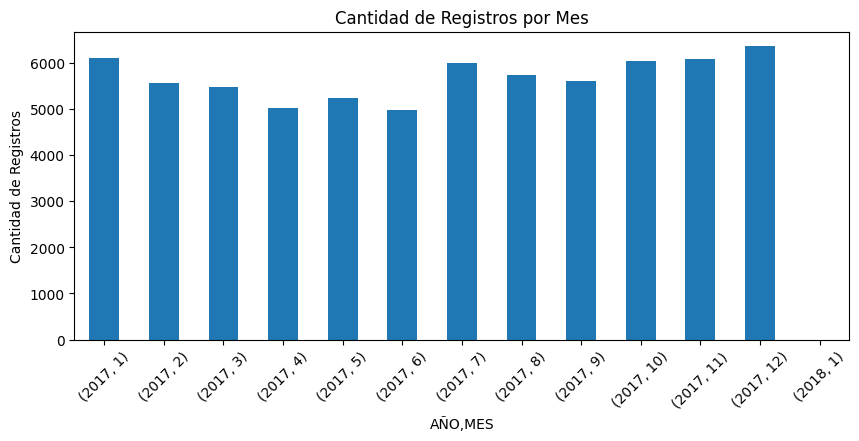

In [66]:
df.groupby(['AÑO','MES']).count()['Fecha-I'].plot(kind='bar', figsize=(10,4), legend=False, rot=45)
plt.title('Cantidad de Registros por Mes')
plt.ylabel('Cantidad de Registros')
plt.show()